В цьому домашньому завданні ми проведемо додаткові експерименти для рішення задачі бінарної класифікації і створимо ваш новий submission на змагання на Kaggle.

-----------


**Завдання 0**. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

**Завдання 1**. **Збираємо весь код з попереднього ДЗ в одному місці.** В лекційному ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb` ми познайомились з поняттям пайплайнів, а також я показала, як компактно виглядає рішення МЛ задачі, якщо ми зберемо весь код разом.

Оскільки ми далі будемо робити експерименти, які включають ті самі етапи попередньої обробки, але інше моделювання - буде зручно мати весь код компактно і під рукою. Тому зараз ми займемось збором коду до купи :) Після цього завдання для подальших експериментів ви можете перенести частини розвʼязку взагалі в окремий `.py` файл, аби було зручно імпортувати функції.

Зі свого рішення в попередньому домашньому завданні (`Логістична регресія з scikit learn.ipynb`) зберіть усі кроки розвʼязку задачі разом з використанням `sklearn.Pipeline` за прикладом з лекції.

Ваш код нижче має містити
1. Читання даних з файлу (поза пайплайном).
2. Розбиття на тренувальний і валідаційний набори, де валідаційний містить 20% даних (поза пайплайном).
3. Виділення категоріальних і числових колонок (поза пайплайном).
4. Підготовку категоріальних і числових колонок (частина пайплайну). В прикладі в лекції ми оформлювали обробку числових і категоріальних колонок в окремі трансформери `numeric_transformer`, `categorical_cols`. Рекоемндую зробити саме так, так потім зручніше вносити зміни :)
5. Тренування лог регресії (частина пайплайну).
6. Запуск пайплайну на тренування на трен. даних (поза пайплайном).
7. Запуск пайплайну на передбачення на трен і вал. даних і вимір метрик якості ROC-AUC + вивдення Confusion Matrix (поза пайплайном).
8. Збереження моделі в формат joblib (поза пайплайном).

Ви це все вже зробили в попереднтьому ДЗ! Тож, тут просто заадча все зібрати разом.

Нижче я додала підказки, що покроково ви маєте зробити. Якщо ви почуваєтесь впевнено, можете видалити ці підказки і реалізувати все самостійно, або ж - просто заповнити пропуски.

Завдання оцінюється в 10 балів. Головний результат - аби код в фіналі був робочий. Бо за не робочий нам гроші ніхто не заплатить :)

In [ ]:
raw_df = pd.read_csv(..., index_col=0)

train_df, val_df = train_test_split(...)

# Створюємо трен. і вал. набори
input_cols = ...
target_col = ...
train_inputs, train_targets = ...
val_inputs, val_targets = ...

# Виявляємо числові і категоріальні колонки
numeric_cols = ...
categorical_cols = ...

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', ...)
])

categorical_transformer = Pipeline(steps=[
    ('onehot', ...)
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', ...),
        ('cat', ...)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', ...),
    ('classifier', ...)
])

# Тренуємо пайплайн
....

# Функція, щоб передбачати і рахувати метрики
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    roc_auc = ...
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}%")
    confusion_matrix_ = ...
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(...)
val_preds = predict_and_plot(...)

# Зберігаємо модель для подальшого використання
joblib.dump(...)


In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2'

In [4]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: andrianazadorozhna
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 918kB/s]


Extracting archive ./bank-customer-churn-prediction-dlu-course-c-2/bank-customer-churn-prediction-dlu-course-c-2.zip to ./bank-customer-churn-prediction-dlu-course-c-2


In [5]:
import os

In [6]:
data_dir = './bank-customer-churn-prediction-dlu-course-c-2'

In [7]:
os.listdir(data_dir)

['test.csv', 'sample_submission.csv', 'train.csv']

In [8]:
train_csv = data_dir + '/train.csv'

In [9]:
import pandas as pd

In [10]:
raw_df = pd.read_csv(train_csv)

In [11]:
raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = raw_df.drop(columns= "Exited")
y = raw_df["Exited"]

In [14]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size = 0.2,
    random_state=42,
    stratify=y
)

In [15]:
input_cols = list(raw_df.columns)[:-1]
target_col = 'Exited'

print("Вхідні колонки:", input_cols)
print("Цільова колонка:", target_col)

Вхідні колонки: ['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Цільова колонка: Exited


In [16]:
train_inputs = X_train[input_cols].copy()
train_targets = y_train.copy()

val_inputs = X_val[input_cols].copy()
val_targets = y_val.copy()

In [17]:
numeric_cols = raw_df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = raw_df.select_dtypes(include=['object', 'category']).columns.tolist()

In [18]:
print("Числові колонки:", numeric_cols)
print("Категоріальні колонки:", categorical_cols)

Числові колонки: ['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Категоріальні колонки: ['Surname', 'Geography', 'Gender']


In [19]:
train_inputs = train_inputs.drop(columns=['CustomerId', 'Surname'], errors='ignore')
val_inputs = val_inputs.drop(columns=['CustomerId', 'Surname'], errors='ignore')

In [20]:
train_inputs

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7180,7180,682.0,France,Male,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24
10393,10393,684.0,France,Female,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31
80,80,705.0,Germany,Male,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01
3365,3365,669.0,Spain,Male,58.0,0.0,0.00,2.0,0.0,1.0,51565.98
12236,12236,707.0,France,Male,21.0,3.0,0.00,2.0,1.0,1.0,148564.76
...,...,...,...,...,...,...,...,...,...,...,...
9493,9493,633.0,France,Female,33.0,4.0,0.00,2.0,0.0,0.0,123537.05
8463,8463,673.0,France,Female,40.0,1.0,0.00,1.0,1.0,1.0,47832.82
8143,8143,621.0,France,Male,29.0,8.0,0.00,2.0,1.0,1.0,133535.29
11512,11512,590.0,Spain,Male,42.0,7.0,0.00,2.0,0.0,0.0,72643.95


In [21]:
raw_df['Gender'].nunique()

2

In [22]:
raw_df['Geography'].value_counts()

,count
Geography,
France,9032
Spain,3303
Germany,2665


In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [24]:
numeric_cols = train_inputs.select_dtypes(include=['number']).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['object', 'category']).columns.tolist()

In [26]:
numeric_cols = train_inputs.select_dtypes(include=['number']).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_cols = [col for col in numeric_cols if col != 'id']
categorical_cols = [col for col in categorical_cols if col != 'id']

print("Числові колонки після оновлення:", numeric_cols)
print("Категоріальні колонки після оновлення:", categorical_cols)

Числові колонки після оновлення: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Категоріальні колонки після оновлення: ['Geography', 'Gender']


In [27]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [28]:
train_inputs[numeric_cols].isna().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [29]:
numeric_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [31]:
train_inputs_prepared = preprocessor.fit_transform(train_inputs)
val_inputs_prepared = preprocessor.transform(val_inputs)

In [32]:
categorical_feature_names = list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols))

final_columns = numeric_cols + categorical_feature_names

print("Форма оброблених даних (train_inputs_prepared):", train_inputs_prepared.shape)
print("Кількість назв колонок у final_columns:", len(final_columns))

train_inputs_prepared_df = pd.DataFrame(train_inputs_prepared, columns=final_columns, index=train_inputs.index)
val_inputs_prepared_df = pd.DataFrame(val_inputs_prepared, columns=final_columns, index=val_inputs.index)

Форма оброблених даних (train_inputs_prepared): (12000, 13)
Кількість назв колонок у final_columns: 13


In [33]:
print("Тренувальні дані після обробки (перші 5 рядків):")
display(train_inputs_prepared_df.head())

print("Валідаційні дані після обробки (перші 5 рядків):")
display(val_inputs_prepared_df.head())

Тренувальні дані після обробки (перші 5 рядків):


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.320187,-0.944682,-1.447264,1.475464,-1.108193,0.515062,1.016977,0.569450,1.0,0.0,0.0,0.0,1.0
10393,0.347838,0.161227,-1.087792,2.254434,-1.108193,0.515062,-0.983306,0.603803,1.0,0.0,0.0,1.0,0.0
80,0.638166,-0.330288,0.350096,1.223831,0.769304,0.515062,-0.983306,1.238026,0.0,1.0,0.0,0.0,1.0
3365,0.140460,2.495924,-1.806736,-0.717950,0.769304,-1.941514,1.016977,-1.457116,0.0,0.0,1.0,0.0,1.0
12236,0.665816,-2.050591,-0.728320,-0.717950,0.769304,0.515062,1.016977,0.670629,1.0,0.0,0.0,0.0,1.0


Валідаційні дані після обробки (перші 5 рядків):


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.762592,1.021379,-1.447264,1.214543,4.524299,0.515062,1.016977,-0.988144,0.0,1.0,0.0,0.0,1.0
3646,-0.910252,0.406985,-0.009376,-0.717950,0.769304,0.515062,1.016977,-1.750392,1.0,0.0,0.0,0.0,1.0
5306,0.997620,0.038348,-1.087792,-0.717950,0.769304,-1.941514,1.016977,-0.022404,1.0,0.0,0.0,1.0,0.0
652,0.195761,0.652742,-0.368848,1.881867,-1.108193,-1.941514,1.016977,-0.139723,1.0,0.0,0.0,1.0,0.0
2627,0.264887,-0.944682,-0.368848,-0.717950,0.769304,0.515062,-0.983306,0.563519,0.0,0.0,1.0,1.0,0.0


In [34]:
train_inputs_df = pd.DataFrame(train_inputs_prepared, columns=final_columns, index=train_inputs.index)
val_inputs_df = pd.DataFrame(val_inputs_prepared, columns=final_columns, index=val_inputs.index)

In [35]:
train_targets_df = pd.DataFrame(train_targets, columns=['Exited'], index=train_inputs.index)
val_targets_df = pd.DataFrame(val_targets, columns=['Exited'], index=val_inputs.index)

In [36]:
train_inputs_df.to_parquet('train_inputs.parquet', index=False)
val_inputs_df.to_parquet('val_inputs.parquet', index=False)
train_targets_df.to_parquet('train_targets.parquet', index=False)
val_targets_df.to_parquet('val_targets.parquet', index=False)

In [37]:
saved_files = [file for file in os.listdir() if file.endswith('.parquet')]
print("\nСписок збережених файлів:")
print(saved_files)


Список збережених файлів:
['train_inputs.parquet', 'val_targets.parquet', 'val_inputs.parquet', 'train_targets.parquet']


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [39]:
train_inputs_df = train_inputs_df.assign(id=train_inputs['id'])
val_inputs_df = val_inputs_df.assign(id=val_inputs['id'])


In [40]:
X_train = train_inputs_df.drop(columns=['id'])
X_val = val_inputs_df.drop(columns=['id'])

y_train = train_targets_df['Exited']
y_val = val_targets_df['Exited']

In [41]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# оцінка якості моделі
from sklearn.metrics import classification_report, accuracy_score

print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      2390
         1.0       0.73      0.57      0.64       610

    accuracy                           0.87      3000
   macro avg       0.81      0.76      0.78      3000
weighted avg       0.86      0.87      0.86      3000

Accuracy Score:
0.8696666666666667


In [42]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

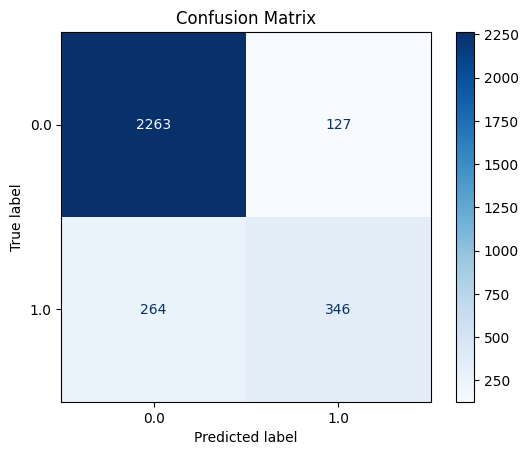

In [43]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

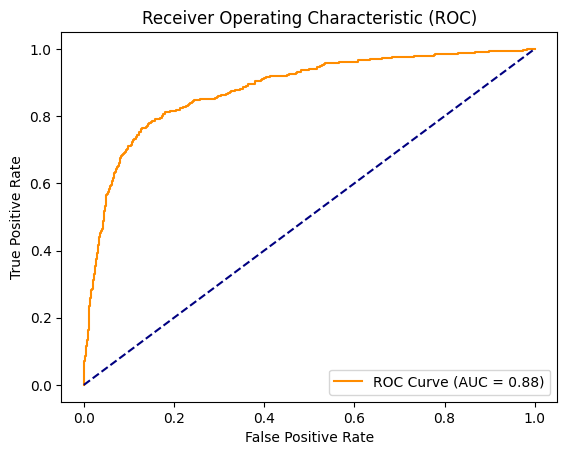

In [44]:
y_proba = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = roc_auc_score(y_val, y_proba)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

In [45]:
f1 = f1_score(y_val, y_pred)
print(f"F1 Score (Threshold = 0.5): {f1:.2f}")

F1 Score (Threshold = 0.5): 0.64


In [46]:
import joblib

In [47]:
saved_objects = {
    "model": model,
    "train_inputs_columns": X_train.columns.tolist(),
    "numeric_transformer": numeric_transformer,
    "categorical_transformer": categorical_transformer,
    "preprocessor": preprocessor  # весь ColumnTransformer
}

In [48]:
joblib.dump(saved_objects, 'log_reg.joblib')

['log_reg.joblib']

In [49]:
loaded_objects = joblib.load('log_reg.joblib')
model_2 = loaded_objects["model"]

**Завдання 2**. Такс, у нас з вами є вже готовий пайплайн. Давайте проведемо нові експерименти.

  Додайте в попередню обробку числових колонок генерацію polinomal features до степені 2 включно. Для цього створіть новий препроцесор і створіть новий пайплайн.

  Запустіть пайплайн на тренування і виведіть метрики для тренувального і валідаційного набору. Напишіть, як вам модель? Чи спостерігається в цій моделі overfit чи underfit? Чи ця модель добре генералізує?

In [64]:
from sklearn.preprocessing import PolynomialFeatures

# оновлюємо numeric_transformer з поліноміальними ознаками
numeric_transformer_poly = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Генеруємо поліноміальні ознаки
])

# оновлюємо preprocessor
preprocessor_poly = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_poly, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# створюємо новий пайплайн з оновленим preprocessor
model_pipeline_poly = Pipeline(steps=[
    ('preprocessor', preprocessor_poly),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

model_pipeline_poly.fit(train_inputs, train_targets)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [62]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt

# прогнози на тренувальному наборі
train_preds_poly = model_pipeline_poly.predict(train_inputs)
train_proba_poly = model_pipeline_poly.predict_proba(train_inputs)[:, 1]

# прогнози на валідаційному наборі
val_preds_poly = model_pipeline_poly.predict(val_inputs)
val_proba_poly = model_pipeline_poly.predict_proba(val_inputs)[:, 1]

In [63]:
# метрики для тренувального набору
print("Тренувальний набір:")
print("Classification Report:")
print(classification_report(train_targets, train_preds_poly))
print("Accuracy Score:", accuracy_score(train_targets, train_preds_poly))

# метрики для валідаційного набору
print("\nВалідаційний набір:")
print("Classification Report:")
print(classification_report(val_targets, val_preds_poly))
print("Accuracy Score:", accuracy_score(val_targets, val_preds_poly))

Тренувальний набір:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      9558
         1.0       0.81      0.68      0.74      2442

    accuracy                           0.90     12000
   macro avg       0.86      0.82      0.84     12000
weighted avg       0.90      0.90      0.90     12000

Accuracy Score: 0.9015

Валідаційний набір:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      2390
         1.0       0.78      0.68      0.72       610

    accuracy                           0.90      3000
   macro avg       0.85      0.81      0.83      3000
weighted avg       0.89      0.90      0.89      3000

Accuracy Score: 0.895


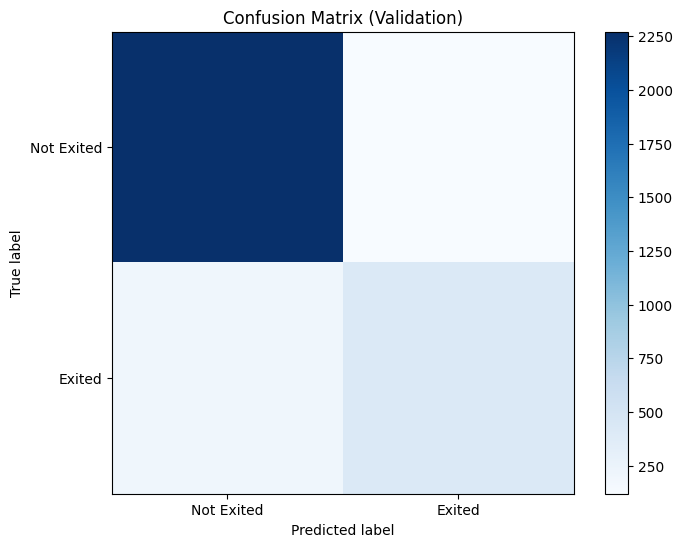

In [61]:
# confusion matrix для валідаційного набору
cm = confusion_matrix(val_targets, val_preds_poly)
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix (Validation)")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.yticks([0, 1], ['Not Exited', 'Exited'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

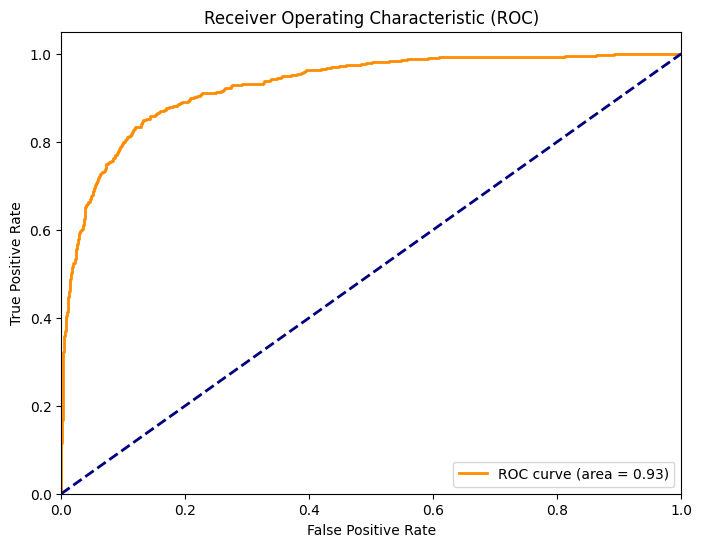

In [60]:
# ROC-крива для валідаційного набору
fpr, tpr, _ = roc_curve(val_targets, val_proba_poly)
roc_auc = roc_auc_score(val_targets, val_proba_poly)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [59]:
f1 = f1_score(val_targets, val_preds_poly)
print(f"F1 Score (Validation): {f1:.2f}")

F1 Score (Validation): 0.72


In [72]:
test_csv_path = data_dir + '/test.csv'
test_df = pd.read_csv(test_csv_path)

In [73]:
test_df_cleaned = test_df.drop(columns=['CustomerId', 'Surname'], errors='ignore')

test_predictions = model_pipeline_poly.predict_proba(test_df_cleaned)[:, 1]

In [74]:
sample_submission_path = data_dir + '/sample_submission.csv'
submission_df = pd.read_csv(sample_submission_path)

submission_df['Exited'] = test_predictions

submission_path = 'submission_poly_features_task2.csv'
submission_df.to_csv(submission_path, index=False)

print(f"Submission збережено у файл: {submission_path}")

Submission збережено у файл: submission_poly_features_task2.csv


Бачимо, що енерація поліноміальних ознак покращила продуктивність моделі, про що свідчить зростання метрики F1-score на валідаційному наборі з 0.64 до 0.72 і збільшення AUC до 0.93, що вказує на більш точну дискримінацію між класами.

**Завдання 3**. Тепер давайте створимо ще новий пайплайн, тільки тепер поліноміальні ознаки згенеруємо до степені 4. Зробіть висновок про якість моделі. Якщо вам подобається резульат якоїсь з моделей в цьому ДЗ - рекомендую зробити submission в змаганні.

In [65]:
numeric_transformer_poly4 = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4, include_bias=False))  # Генеруємо поліноміальні ознаки до степені 4
])

preprocessor_poly4 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_poly4, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [66]:
model_pipeline_poly4 = Pipeline(steps=[
    ('preprocessor', preprocessor_poly4),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

In [67]:
model_pipeline_poly4.fit(train_inputs, train_targets)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=4,
                                                                                      include_bias=False))]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [68]:
train_preds_poly4 = model_pipeline_poly4.predict(train_inputs)
train_proba_poly4 = model_pipeline_poly4.predict_proba(train_inputs)[:, 1]
print("Тренувальний набір:")
print("Classification Report:")
print(classification_report(train_targets, train_preds_poly4))
print("Accuracy Score:", accuracy_score(train_targets, train_preds_poly4))

val_preds_poly4 = model_pipeline_poly4.predict(val_inputs)
val_proba_poly4 = model_pipeline_poly4.predict_proba(val_inputs)[:, 1]
print("\nВалідаційний набір:")
print("Classification Report:")
print(classification_report(val_targets, val_preds_poly4))
print("Accuracy Score:", accuracy_score(val_targets, val_preds_poly4))

Тренувальний набір:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      9558
         1.0       0.83      0.69      0.75      2442

    accuracy                           0.91     12000
   macro avg       0.88      0.83      0.85     12000
weighted avg       0.90      0.91      0.90     12000

Accuracy Score: 0.908

Валідаційний набір:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      2390
         1.0       0.77      0.67      0.71       610

    accuracy                           0.89      3000
   macro avg       0.84      0.81      0.82      3000
weighted avg       0.89      0.89      0.89      3000

Accuracy Score: 0.891


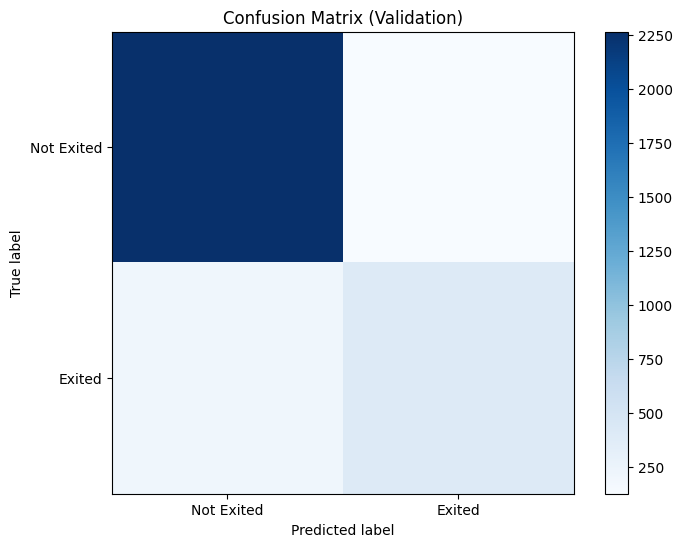

In [69]:
cm = confusion_matrix(val_targets, val_preds_poly4)
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix (Validation)")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.yticks([0, 1], ['Not Exited', 'Exited'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

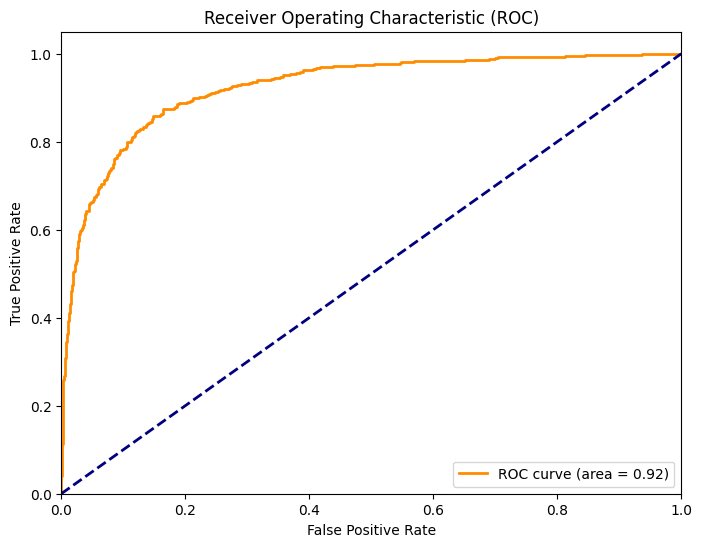

In [70]:
#ROC
fpr, tpr, _ = roc_curve(val_targets, val_proba_poly4)
roc_auc = roc_auc_score(val_targets, val_proba_poly4)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [71]:
f1 = f1_score(val_targets, val_preds_poly4)
print(f"F1 Score (Validation): {f1:.2f}")

F1 Score (Validation): 0.71


In [76]:
test_csv_path = './bank-customer-churn-prediction-dlu-course-c-2/test.csv'
test_df = pd.read_csv(test_csv_path)

In [77]:
test_df_cleaned = test_df.drop(columns=['CustomerId', 'Surname'], errors='ignore')

test_predictions = model_pipeline_poly4.predict_proba(test_df_cleaned)[:, 1]

In [78]:
sample_submission_path = data_dir + '/sample_submission.csv'
submission_df = pd.read_csv(sample_submission_path)

submission_df['Exited'] = test_predictions

submission_path = 'submission_poly_features_task3.csv'
submission_df.to_csv(submission_path, index=False)

print(f"Submission збережено у файл: {submission_path}")

Submission збережено у файл: submission_poly_features_task3.csv


**Завдання 4. Перенавчання і регуляризація**.

  Скачайте набір даних `regression_data.csv`. Звичайте набір даних з `regression_data.csv`, розбийте на train і test (в тест 20%) і натренуйте модель лінійної регресії з масштабуванням числових ознак і поліноміальними ознаками до степені **5 включно**.

  Виміряйте якість прогностичної моделі і зробіть висновок, чи модель хороша, чи вона добре генералізує?


In [79]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [80]:
!ls drive/MyDrive/ML

application_data.csv.zip	columns_description.csv       regression_data.csv    train.csv
application_data_processed.zip	medical-charges.csv	      sample_submission.csv
cars.csv			previous_application.csv.zip  test.csv


In [81]:
regression_data = pd.read_csv("drive/MyDrive/ML/regression_data.csv")

In [82]:
regression_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-0.190339,-1.382800,-0.875618,0.538910,-1.037246,28.938854
1,-0.321386,-0.563725,0.412931,-0.147057,-0.825497,-7.664581
2,2.122156,-1.519370,1.032465,-1.260884,0.917862,-63.845482
3,-1.380101,-0.055548,-1.703382,0.074095,1.628616,4.076259
4,-0.072829,-1.514847,-0.846794,0.714000,0.473238,34.879013


In [83]:
X = regression_data.drop(columns=["target"])
y = regression_data["target"]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=5, include_bias=False)),
    ('regressor', LinearRegression())
])

In [88]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('regressor', LinearRegression())])

In [89]:
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [90]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [91]:
print("МЕТРИКИ НА ТРЕНУВАЛЬНОМУ НАБОРІ:")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"R2 Score: {r2_train:.2f}\n")

print("МЕТРИКИ НА ТЕСТОВОМУ НАБОРІ:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"R2 Score: {r2_test:.2f}")

МЕТРИКИ НА ТРЕНУВАЛЬНОМУ НАБОРІ:
Mean Squared Error (MSE): 0.00
R2 Score: 1.00

МЕТРИКИ НА ТЕСТОВОМУ НАБОРІ:
Mean Squared Error (MSE): 1269.36
R2 Score: 0.46


**Висновок**

Результати показують, що модель значно перенавчилася на тренувальному наборі, оскільки MSE = 0.00 і R2 = 1.00, що є ознаками ідеального навчання на тренувальних даних. Однак на тестовому наборі MSE = 1269.36 і R2 = 0.46, що свідчить про погану генералізацію моделі та її низьку ефективність на нових даних.

**Завдання 5**. Натренуйте моделі Lasso(), Ridge(), ElasaticNet() на цих даних (з поліном ознаками до степені 20 включно), порівняйте якість з тою, яка була отримана з лінійною регресією. Яка модель найкраще генералізує і чому на ваш погляд (можливо треба буде для відповіді зробити додатковий аналіз ознак)?

In [94]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [92]:
X = regression_data.drop(columns=['target'])
y = regression_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
poly = PolynomialFeatures(degree=20, include_bias=False)

In [95]:
models = {
    "Lasso": Lasso(alpha=0.1, max_iter=10000, random_state=42),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, random_state=42)
}

In [99]:
results = {}

for name, model in models.items():

    pipeline = Pipeline(steps=[
        ('poly', poly),
        ('scaler', StandardScaler()),
        ('model', model)
    ])


    pipeline.fit(X_train, y_train)


    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)


    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results[name] = {
        "MSE (Train)": mse_train,
        "MSE (Test)": mse_test,
        "R2 (Train)": r2_train,
        "R2 (Test)": r2_test
    }

In [101]:
import pandas as pd
results_df = pd.DataFrame(results).T
results_df.columns = ["MSE (Train)", "MSE (Test)", "R2 (Train)", "R2 (Test)"]
print(results_df)

            MSE (Train)  MSE (Test)  R2 (Train)  R2 (Test)
Lasso          0.930338    1.630970    0.999522   0.999301
Ridge          1.110221  772.706782    0.999430   0.668802
ElasticNet    10.608958   55.814348    0.994553   0.976077


**Висновок**

**Lasso** показує найкращу здатність до узагальнення (R2 Test = 0.999301) та має найнижчий MSE на тестовому наборі (1.63), що свідчить про добре налаштовану модель для цього набору даних.
**Ridge** демонструє високу точність на тренувальному наборі (R2 Train = 0.999430), але значно гіршу на тестовому (R2 Test = 0.668802), що може вказувати на певне перенавчання.
**ElasticNet** має найгіршу якість на тестовому наборі (R2 Test = 0.976077, MSE Test = 55.81), що вказує на недостатню здатність до узагальнення в порівнянні з Lasso.

Отже виходить, що модель Lasso є найбільш придатною для цього завдання, том у що вона демонструє стабільно високу точність як на тренувальних, так і на тестових даних.